In [296]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime
import seaborn as sns
import statsmodels.api as sm
# Load specific forecasting tools
from statsmodels.tsa.ar_model import AR,ARResults
from statsmodels.tsa.seasonal import seasonal_decompose
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
folders = []
files = []
#folders
# ED_traffic-data_FY2019_Q1_csv
# ED_trips_2018-07.csv, ED_trips_2018-08.csv, ED_trips_2018-09.csv
# ED_traffic-data_FY2019_Q2_csv
# ED_trips_2018-10.csv	ED_trips_2018-11.csv	ED_trips_2018-12.csv
# ED_traffic-data_FY2019_Q3_csvs
# ED_trips_2019-01.csv	ED_trips_2019-02.csv	ED_trips_2019-03.csv
# ED_traffic-data_FY2019_Q4_csv
# ED_trips_2019-04.csv	ED_trips_2019-05.csv	ED_trips_2019-06.csv
quarter = ['ED_traffic-data_FY2019_Q3_csv',
           'ED_traffic-data_FY2019_Q4_csv',
           'ED_traffic-data_FY2019_Q1_csv',
           'ED_traffic-data_FY2019_Q2_csv']
files = ['ED_trips_2019-01.csv',
         'ED_trips_2019-02.csv',
         'ED_trips_2019-03.csv',
         'ED_trips_2019-04.csv',
         'ED_trips_2019-05.csv',
         'ED_trips_2019-06.csv',
         'ED_trips_2018-07.csv',
         'ED_trips_2018-08.csv',
         'ED_trips_2018-09.csv',
         'ED_trips_2018-10.csv',
         'ED_trips_2018-11.csv',
         'ED_trips_2018-12.csv']
dataframes = []
aug = 0
1,2,3, 4,5,6, 7,8,9, 10,11,12
for q in quarter:
    for z in range(3):
        print((aug * 3) + (z + 1))
        filename = q + '/' + files[(aug * 3) + (z)]
        print(filename)
        dataframes.append(
             pd.read_csv(filename)
             )
    aug += 1
        
#q1 = pd.read_csv('ED_traffic-data_FY2019_Q1_csv/ED_trips_2018-07.csv')
#q11 = pd.read_csv('ED_traffic-data_FY2019_Q1_csv/ED_trips_2018-07.csv')

#q2 = pd.read_csv('ED_traffic-data_FY2019_Q2_csv/ED_trips_2018-07.csv')


#q3 = pd.read_csv('ED_traffic-data_FY2019_Q3_csv/ED_trips_2018-07.csv')


#q4 = pd.read_csv('ED_traffic-data_FY2019_Q4_csv/ED_trips_2018-07.csv')
#read in, clean, concat
#force garbage cleaning
#database -> query

1
ED_traffic-data_FY2019_Q3_csv/ED_trips_2019-01.csv
2
ED_traffic-data_FY2019_Q3_csv/ED_trips_2019-02.csv
3
ED_traffic-data_FY2019_Q3_csv/ED_trips_2019-03.csv
4
ED_traffic-data_FY2019_Q4_csv/ED_trips_2019-04.csv
5
ED_traffic-data_FY2019_Q4_csv/ED_trips_2019-05.csv
6
ED_traffic-data_FY2019_Q4_csv/ED_trips_2019-06.csv
7
ED_traffic-data_FY2019_Q1_csv/ED_trips_2018-07.csv
8
ED_traffic-data_FY2019_Q1_csv/ED_trips_2018-08.csv
9
ED_traffic-data_FY2019_Q1_csv/ED_trips_2018-09.csv
10
ED_traffic-data_FY2019_Q2_csv/ED_trips_2018-10.csv
11
ED_traffic-data_FY2019_Q2_csv/ED_trips_2018-11.csv
12
ED_traffic-data_FY2019_Q2_csv/ED_trips_2018-12.csv


In [ ]:
#___________________tollAB________________________________
#           __--~~~~tollC

In [2]:
dataframes[1]

,AssetID,FinancialQtrID,Date,IntervalStart,IntervalEnd,Version,VehicleClass,TollPointID,GantryDirection,GantryLocation,GantryGPSLatitude,GantryGPSLongitude,GantryType,TotalVolume
0,ED,201903,2019-02-01,00:00,00:14,1,Car,AB,N,Woolloomooloo Toll Plaza North-bound,-33.869714,151.218398,Mainline Gantry,90
1,ED,201903,2019-02-01,00:00,00:14,1,Truck,AB,N,Woolloomooloo Toll Plaza North-bound,-33.869714,151.218398,Mainline Gantry,2
2,ED,201903,2019-02-01,00:00,00:14,1,Car,C,N,William Street North-bound exit ramp,-33.875924,151.217253,Ramp Gantry,15
3,ED,201903,2019-02-01,00:00,00:14,1,Truck,C,N,William Street North-bound exit ramp,-33.875924,151.217253,Ramp Gantry,1
4,ED,201903,2019-02-01,00:15,00:29,1,Car,AB,N,Woolloomooloo Toll Plaza North-bound,-33.869714,151.218398,Mainline Gantry,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10309,ED,201903,2019-02-28,23:30,23:44,1,Car,C,N,William Street North-bound exit ramp,-33.875924,151.217253,Ramp Gantry,25
10310,ED,201903,2019-02-28,23:30,23:44,1,Truck,C,N,William Street North-bound exit ramp,-33.875924,151.217253,Ramp Gantry,1
10311,ED,201903,2019-02-28,23:45,23:59,1,Car,AB,N,Woolloomooloo Toll Plaza North-bound,-33.869714,151.218398,Mainline Gantry,60
10312,ED,201903,2019-02-28,23:45,23:59,1,Truck,AB,N,Woolloomooloo Toll Plaza North-bound,-33.869714,151.218398,Mainline Gantry,3


In [214]:
def clean_dfs(dataframe_list, desired_vehicle):
    clean_dataframe_list = []
    cols_to_remove = ['AssetID', "FinancialQtrID", "Version", "GantryDirection", "GantryType",
                  "GantryGPSLatitude", "GantryGPSLongitude"]
    for dataframe in dataframe_list:
        dataframe.drop(columns = cols_to_remove, inplace=True)
        dataframe_only_desired_vehicle = dataframe[dataframe['VehicleClass'] == desired_vehicle]
        clean_dataframe_list.append(dataframe_only_desired_vehicle)
    return clean_dataframe_list

In [21]:
q1.head(20)

,AssetID,FinancialQtrID,Date,IntervalStart,IntervalEnd,Version,VehicleClass,TollPointID,GantryDirection,GantryLocation,GantryGPSLatitude,GantryGPSLongitude,GantryType,TotalVolume
0,ED,201901,2018-07-01,00:00,00:14,1,Truck,C,N,William Street North-bound exit ramp,-33.875924,151.217253,Ramp Gantry,1
1,ED,201901,2018-07-01,00:00,00:14,1,Car,C,N,William Street North-bound exit ramp,-33.875924,151.217253,Ramp Gantry,44
2,ED,201901,2018-07-01,00:00,00:14,1,Truck,AB,N,Woolloomooloo Toll Plaza North-bound,-33.869714,151.218398,Mainline Gantry,4
3,ED,201901,2018-07-01,00:00,00:14,1,Car,AB,N,Woolloomooloo Toll Plaza North-bound,-33.869714,151.218398,Mainline Gantry,113
4,ED,201901,2018-07-01,00:15,00:29,1,Car,C,N,William Street North-bound exit ramp,-33.875924,151.217253,Ramp Gantry,40
5,ED,201901,2018-07-01,00:15,00:29,1,Truck,AB,N,Woolloomooloo Toll Plaza North-bound,-33.869714,151.218398,Mainline Gantry,2
6,ED,201901,2018-07-01,00:15,00:29,1,Car,AB,N,Woolloomooloo Toll Plaza North-bound,-33.869714,151.218398,Mainline Gantry,99
7,ED,201901,2018-07-01,00:30,00:44,1,Car,C,N,William Street North-bound exit ramp,-33.875924,151.217253,Ramp Gantry,34
8,ED,201901,2018-07-01,00:30,00:44,1,Truck,AB,N,Woolloomooloo Toll Plaza North-bound,-33.869714,151.218398,Mainline Gantry,3
9,ED,201901,2018-07-01,00:30,00:44,1,Car,AB,N,Woolloomooloo Toll Plaza North-bound,-33.869714,151.218398,Mainline Gantry,84


In [4]:
df = clean_dfs([q1], 'Truck')[0]

NameError: name 'q1' is not defined

In [119]:

dfs = clean_dfs(dataframes, 'Truck')
df_all = dfs[0].append(dfs[1])
dataframes[0].shape

(11293, 7)

In [120]:
dataf = dfs[0]
for d in dataframes[1:]:
    dataf = dataf.append(d)

In [121]:
dataf.shape

(126936, 7)

In [ ]:
#aggregate
#timeframe, hourly, daily, etc
#traffic flow -> in - out
#model entry points

#subset
# - road, direction, vehicle, gantry
# - resample

#determine city center from data
#trucks vs cars
# off time - rush hour

#cycles
# set season 1 set above
#exogenous vars - dummies, holidays, etc
# - seasonal
# - cyclical 
# - day / night 
# - week/weekend 

In [ ]:
#two entry locaitons
# William Street North-bound exit ramp
# Woolloomooloo Toll Plaza North-bound

In [186]:
df_will = dataf[dataf['GantryLocation'] == 'William Street North-bound exit ramp']
df_wool = dataf[dataf['GantryLocation'] == 'Woolloomooloo Toll Plaza North-bound']
df_wool['Date'] = pd.to_datetime(df_wool['Date'] + 'T' + df_wool['IntervalStart'])
df_will['Date'] = pd.to_datetime(df_will['Date'] + 'T' + df_will['IntervalStart'])



In [187]:

#df_wool.drop(columns=['IntervalStart', 'IntervalEnd'], inplace = True)
#df_wool.set_index(df_wool['Date'], inplace = True)
    
df_wool

,Date,IntervalStart,IntervalEnd,VehicleClass,TollPointID,GantryLocation,TotalVolume
3,2019-01-01 00:15:00,00:15,00:29,Truck,AB,Woolloomooloo Toll Plaza North-bound,1
7,2019-01-01 00:30:00,00:30,00:44,Truck,AB,Woolloomooloo Toll Plaza North-bound,3
11,2019-01-01 00:45:00,00:45,00:59,Truck,AB,Woolloomooloo Toll Plaza North-bound,3
15,2019-01-01 01:00:00,01:00,01:14,Truck,AB,Woolloomooloo Toll Plaza North-bound,1
19,2019-01-01 01:15:00,01:15,01:29,Truck,AB,Woolloomooloo Toll Plaza North-bound,3
...,...,...,...,...,...,...,...
11005,2018-12-31 23:15:00,23:15,23:29,Car,AB,Woolloomooloo Toll Plaza North-bound,254
11008,2018-12-31 23:30:00,23:30,23:44,Car,AB,Woolloomooloo Toll Plaza North-bound,194
11009,2018-12-31 23:30:00,23:30,23:44,Truck,AB,Woolloomooloo Toll Plaza North-bound,2
11012,2018-12-31 23:45:00,23:45,23:59,Car,AB,Woolloomooloo Toll Plaza North-bound,121


In [200]:
df_wool.set_index(df_wool['Date'], inplace=True)
df_wool.drop(columns = ['Date'], inplace = True)

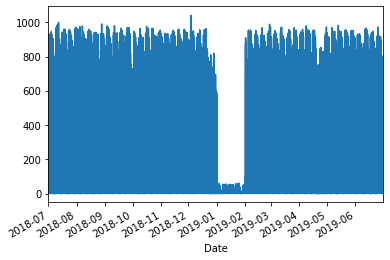

In [202]:
df_wool['TotalVolume'].plot()

In [148]:
df_wool['Date'] = pd.to_datetime(df_wool['Date'] + 'T' + df_wool['IntervalStart'])

In [158]:
df_wool.set_index(df_wool['Date'], inplace = True)

In [159]:
df_will['Date'] = pd.to_datetime(df_will['Date'] + 'T' + df_will['IntervalStart'])

KeyError: 'Date'

In [155]:
df_will.index[0]

'2019-01-01'

In [126]:
df_will['Date'] + '-' + df_will['IntervalStart']

5        2019-01-01-00:15
9        2019-01-01-00:30
13       2019-01-01-00:45
17       2019-01-01-01:00
24       2019-01-01-01:30
               ...       
11006    2018-12-31-23:15
11007    2018-12-31-23:15
11010    2018-12-31-23:30
11011    2018-12-31-23:30
11014    2018-12-31-23:45
Length: 61120, dtype: object

In [150]:
df_will.set_index('Date', inplace = True)

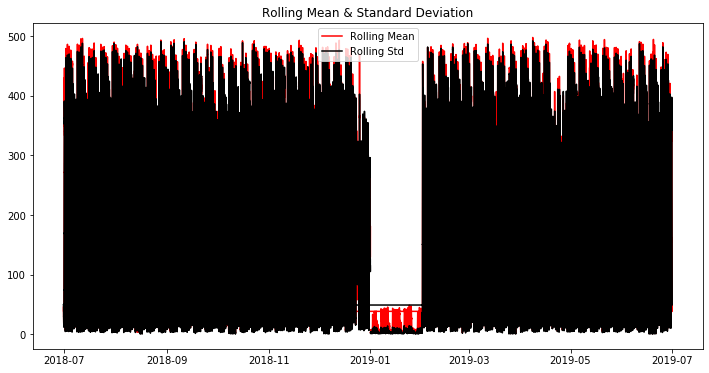

Results of Dickey-Fuller Test: 

Test Statistic                   -33.127361
p-value                            0.000000
#Lags Used                        61.000000
Number of Observations Used    65754.000000
Critical Value (1%)               -3.430449
Critical Value (5%)               -2.861584
Critical Value (10%)              -2.566793
dtype: float64


In [215]:
stationarity_check(df_wool)

In [219]:
df_wool.drop(columns = ['IntervalStart', 'IntervalEnd', 'VehicleClass', 'TollPointID', 'GantryLocation'], inplace = True)

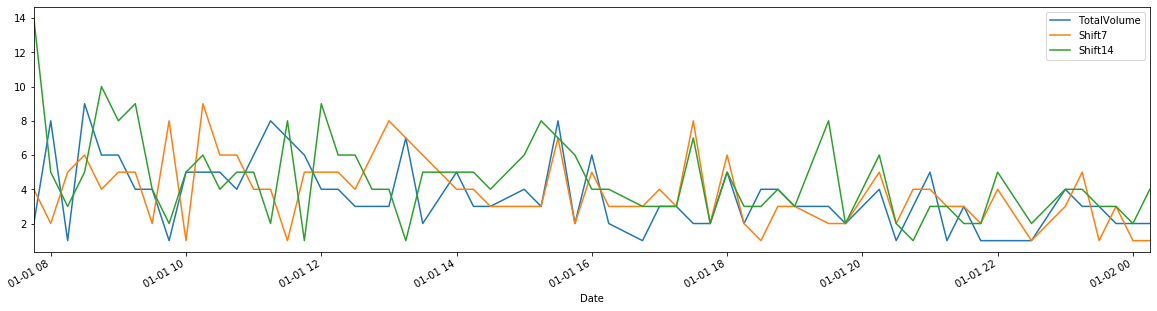

In [234]:
#df_wool['Shift7'] = df_wool.shift(periods=7)
#df_wool['Shift14'] = df_wool['TotalVolume'].shift(periods=14)
df_wool.iloc[30:90].plot(figsize=(20,5))

In [262]:
df_wool_2m = df_wool.iloc[30:90]
df_wool_5m = df_wool.iloc[30:180]
df_wool_1yr = df_wool.iloc[30:400]

In [263]:
df_wool_2m['diff7'] = df_wool_2m['TotalVolume'] - df_wool_2m['Shift7']
df_wool_5m['diff7'] = df_wool_5m['TotalVolume'] - df_wool_5m['Shift7']
df_wool_1yr['diff7'] = df_wool_1yr['TotalVolume'] - df_wool_1yr['Shift7']

In [254]:
df_wool_2m.drop(columns=['Tot'])

KeyError: "None of [Float64Index([-2.0,  6.0, -4.0,  3.0,  2.0,  1.0, -1.0,  2.0, -7.0,  4.0, -4.0,\n              -1.0, -2.0,  2.0,  4.0,  6.0,  1.0, -1.0, -1.0, -1.0, -3.0, -5.0,\n               0.0, -4.0,  1.0, -1.0,  0.0,  1.0,  0.0,  1.0,  0.0,  1.0, -1.0,\n              -2.0, -1.0,  0.0, -6.0,  0.0, -1.0,  0.0,  3.0,  1.0,  0.0,  1.0,\n               0.0, -1.0, -1.0, -1.0,  1.0, -2.0,  0.0, -1.0, -3.0,  0.0,  1.0,\n              -2.0,  2.0, -1.0,  1.0,  1.0],\n             dtype='float64')] are in the [columns]"

In [261]:
df_woolw = df_wool.resample('H').sum()

In [277]:
asd = df_wool.drop(columns=['Shift7', 'Shift14'])

In [290]:
asd[asd['TotalVolume'] > 300]

,TotalVolume
Date,
2018-07-01 00:00:00,372
2018-07-01 06:00:00,678
2018-07-01 07:00:00,1149
2018-07-01 08:00:00,1458
2018-07-01 09:00:00,2074
...,...
2019-06-30 19:00:00,1551
2019-06-30 20:00:00,1295
2019-06-30 21:00:00,1131


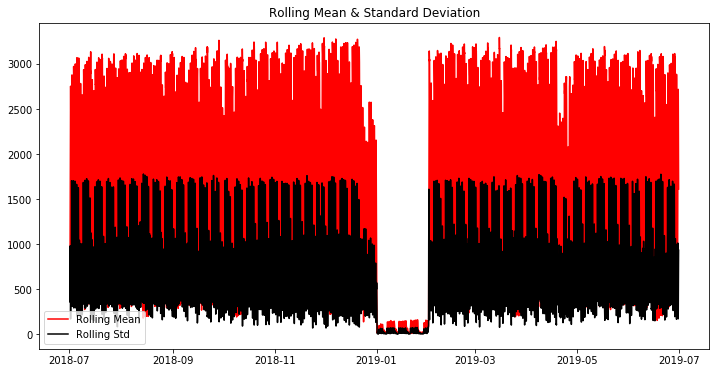

Results of Dickey-Fuller Test: 

Test Statistic                   -4.391369
p-value                           0.000307
#Lags Used                       37.000000
Number of Observations Used    8722.000000
Critical Value (1%)              -3.431100
Critical Value (5%)              -2.861871
Critical Value (10%)             -2.566946
dtype: float64


In [293]:
stationarity_check(asd)
#stationarity_check(df_wool_5m)
#stationarity_check(df_wool_1yr)

In [279]:
# Create a function to check for the stationarity of a given time series using rolling stats and DF test
# Collect and package the code from previous labs

def stationarity_check(TS, column = 'TotalVolume'):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS[column])
    
#     # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    #plt.plot(TS, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

In [13]:
rolling_mean = df_will_DH['TotalVolume'].rolling(window=8, center=False).mean()
rolling_std = df_will_DH['TotalVolume'].rolling(window=8, center=False).std()

NameError: name 'df_will_DH' is not defined

In [258]:
rolling_mean.dropna(inplace=True)
rolling_std.dropna(inplace=True)

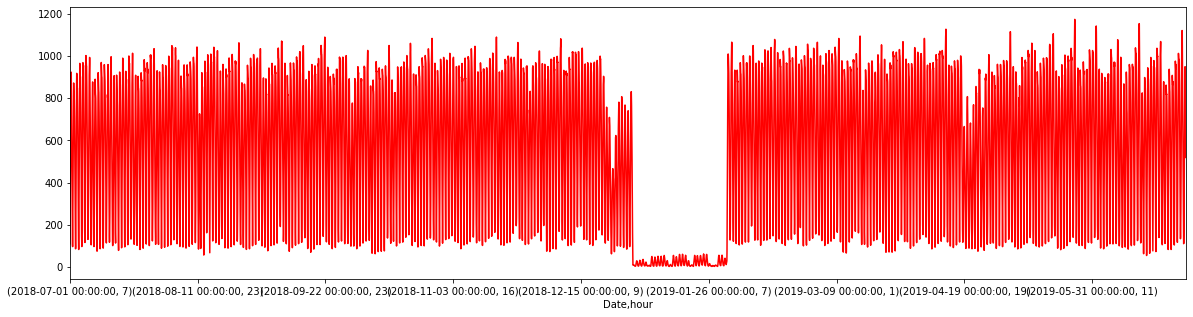

In [261]:
rolling_mean.plot(color='red', label = 'rolling mean')

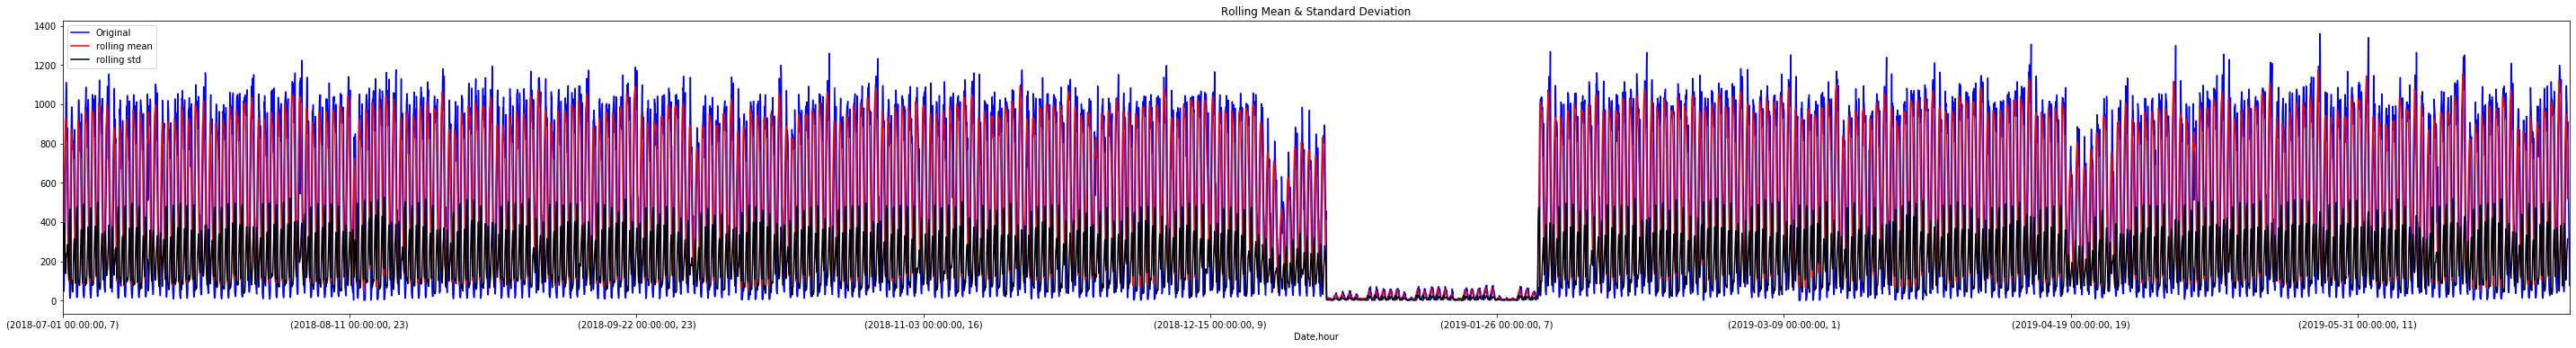

In [265]:
fig = plt.figure(figsize=(50,6))
df_will_DH['TotalVolume'].plot(color='blue',label='Original')
#plt.plot(rolling_mean, color='red', label='Rolling Mean')
#plt.plot(rolling_std, color='black', label = 'Rolling Std')
rolling_mean.plot(color='red', label = 'rolling mean')
rolling_std.plot(color='black', label = 'rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [1]:
df_will_DH.shape

NameError: name 'df_will_DH' is not defined

In [301]:
series1 = pd.DataFrame(np.where(rolling_mean < 200)[1].tolist()).reindex(df_will_DH.index)

IndexError: tuple index out of range

In [307]:
rolling_mean.shape

(8733,)

In [306]:
len(np.where(rolling_mean < 200)[0].tolist())

2029

In [ ]:
series1[0].unique

In [15]:
def toMinutes(s):
    #'00:00'
    return int(s[0] + s[1])

def dfToHour(dataframe, byhour = True, byDay = False):
    df = dataframe.copy()
    if (byhour):
        df['hour'] = df['IntervalStart'].apply(toMinutes)
        return df.groupby(['Date','hour']).sum()
    elif (byDay):
        return df.groupby('Date').sum()
    return df
def dateHour(df):
    df['dateHour'] = str(df['Date']) + str(df['hour'])
    

Timestamp('2018-07-01 00:00:00')

In [176]:
len(df_will.index)# + 
#len(df_will['hour'])
li = []
for x in range(len(df_will)):
    li.append(str(df_will.index[x]) + ':' + str(df_will['hour'][x]))
df_will['datehour'] = li
df_will['datehour']
df_will.set_index('datehour', inplace = True)
df_will.groupby('datehour').sum()


/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TotalVolume,hour
datehour,,
2018-07-01 00:00:00:0:0:0:0:0,2,0
2018-07-01 00:00:00:10:10:10:10:10,9,40
2018-07-01 00:00:00:11:11:11:11:11,8,44
2018-07-01 00:00:00:12:12:12:12:12,10,48
2018-07-01 00:00:00:13:13:13:13:13,14,52
...,...,...
2018-07-31 00:00:00:5:5:5:5:5,31,20
2018-07-31 00:00:00:6:6:6:6:6,54,24
2018-07-31 00:00:00:7:7:7:7:7,48,28


In [16]:
df_will['hour'] = df_will['IntervalStart'].apply(toMinutes)

In [20]:
df_will_date = df_will.groupby('Date').sum()

In [17]:
df_will_DH = df_will.groupby(['Date','hour']).sum()

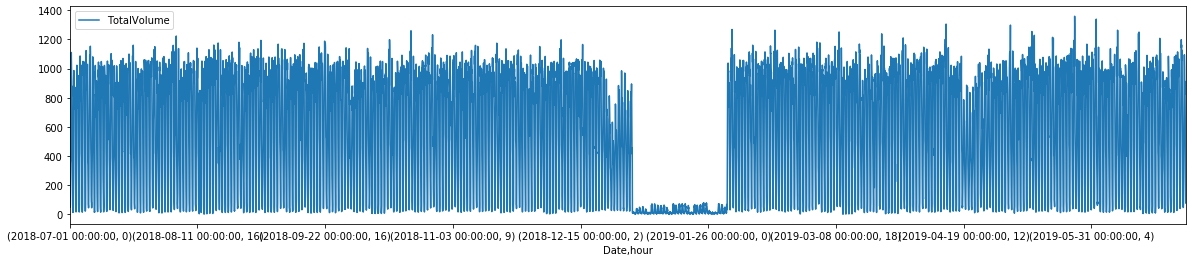

In [18]:
df_will_DH.plot(figsize = (20, 4))

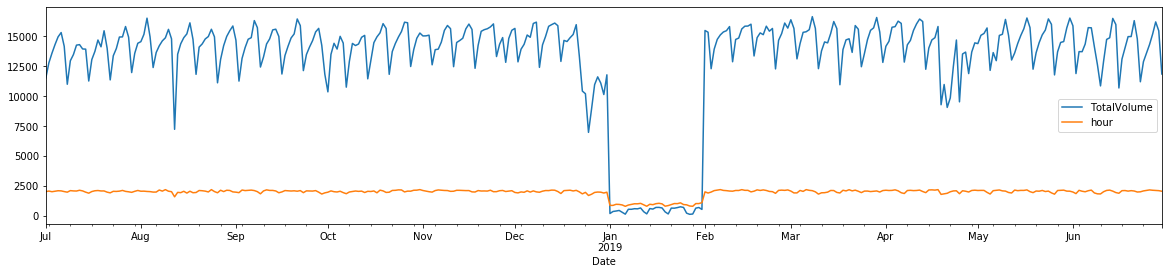

In [21]:
df_will_date.plot(figsize = (20, 4))

In [23]:
df_will_date.drop(columns = 'hour', inplace = True)

In [24]:
df_will_date.head()

,TotalVolume
Date,
2018-07-01,11527
2018-07-02,12794
2018-07-03,13598
2018-07-04,14320
2018-07-05,14966


In [225]:
df_will_DH

TotalVolume
Date       hour             
2018-07-01 0             148
           1              74
           2              71
           3              55
           4              46
...                      ...
2019-06-30 19            533
           20            408
           21            308
           22            253
           23             76

[8740 rows x 1 columns]

In [25]:
df_will_DH

TotalVolume
Date       hour             
2018-07-01 0             148
           1              74
           2              71
           3              55
           4              46
...                      ...
2019-06-30 19            533
           20            408
           21            308
           22            253
           23             76

[8740 rows x 1 columns]

In [26]:
df_will_DH_shift = df_will_DH.shift(periods=24)

In [27]:
df_will_DH['shiftDay'] = df_will_DH_shift

In [30]:
df_will_DH.head(5)

TotalVolume  shiftDay  Diff
Date       hour                             
2018-07-01 0             148       NaN   NaN
           1              74       NaN   NaN
           2              71       NaN   NaN
           3              55       NaN   NaN
           4              46       NaN   NaN

In [29]:
df_will_DH['Diff'] = df_will_DH['TotalVolume'] - df_will_DH['shiftDay']

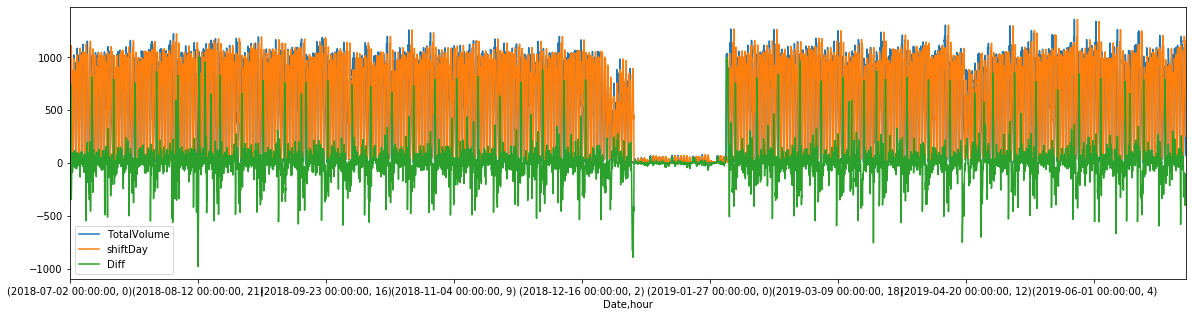

In [31]:
df_will_DH.dropna().plot(figsize = (20, 5))

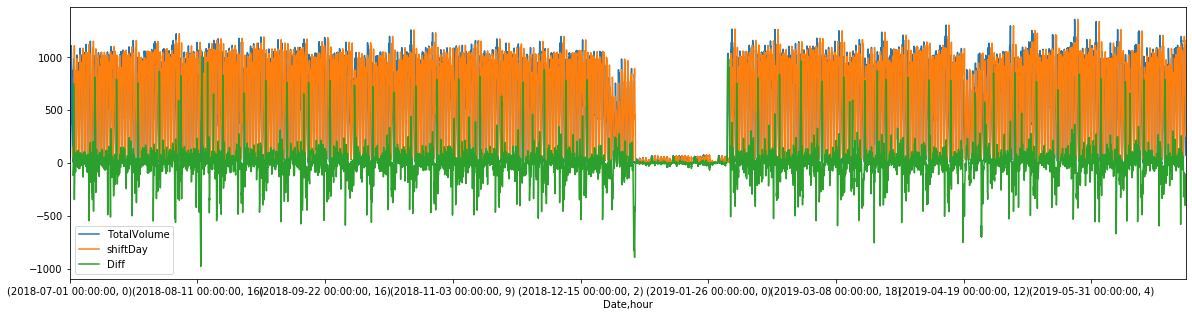

In [32]:
df_will_DH.plot(figsize=(20,5))

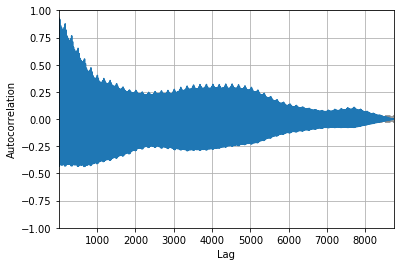

In [33]:
pd.plotting.autocorrelation_plot(df_will_DH['TotalVolume']);

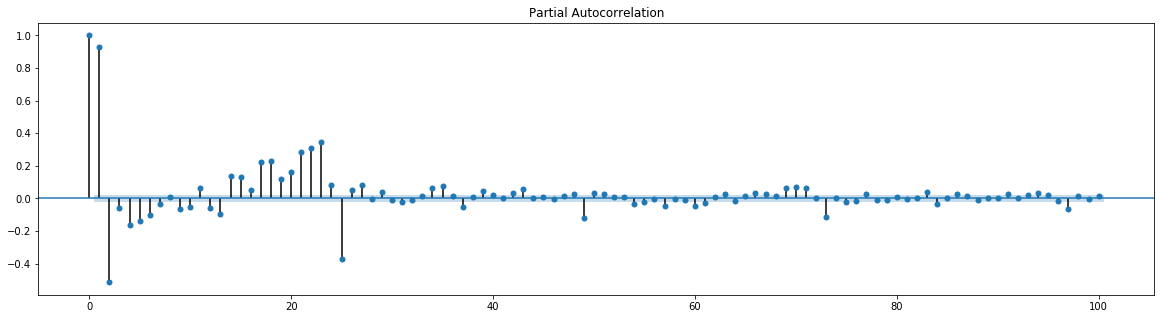

In [34]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 20, 5

plot_pacf(df_will_DH['TotalVolume'], lags=100);

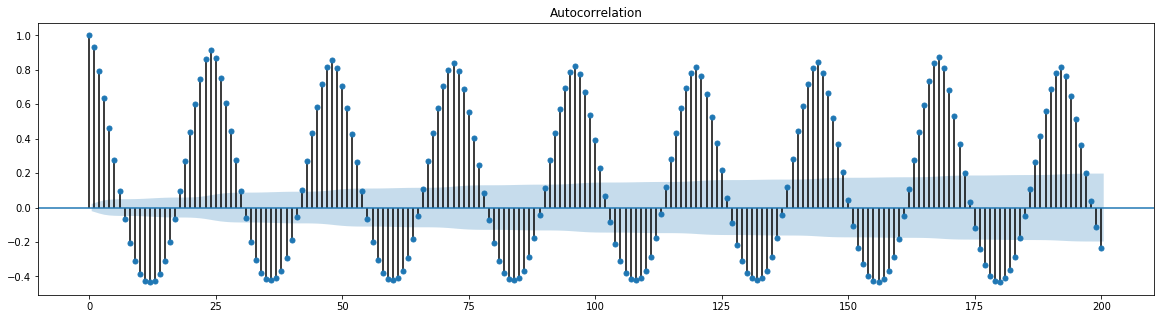

In [35]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 20, 5

plot_acf(df_will_DH['TotalVolume'], lags=a);

ConversionError: Failed to convert value(s) to axis units: array([(Timestamp('2018-07-01 00:00:00'), 0),
       (Timestamp('2018-07-01 00:00:00'), 1),
       (Timestamp('2018-07-01 00:00:00'), 2), ...,
       (Timestamp('2019-06-30 00:00:00'), 21),
       (Timestamp('2019-06-30 00:00:00'), 22),
       (Timestamp('2019-06-30 00:00:00'), 23)], dtype=object)

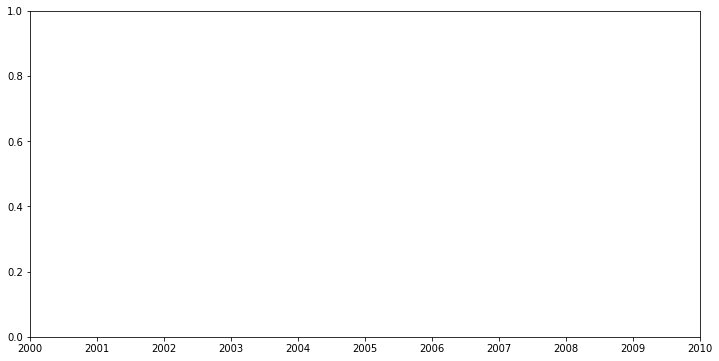

In [36]:
stationarity_check(df_will_DH)

In [37]:
df_will_DH_colhour = df_will_DH['TotalVolume']
len(df_will_DH_colhour)

8740

In [132]:
s = str(df_will_DH_colhour.index[0][0]) + ':' + str(df_will_DH_colhour.index[0][1])
index = []
for x in range(len(df_will_DH_colhour)):
    s = str(df_will_DH_colhour.index[x][0]) + ':' + str(df_will_DH_colhour.index[x][1])
    index.append(s)
ind = pd.Series(index)

736

In [148]:
df_will_DH.index

MultiIndex([('2018-07-01',  0),
            ('2018-07-01',  1),
            ('2018-07-01',  2),
            ('2018-07-01',  3),
            ('2018-07-01',  4),
            ('2018-07-01',  5),
            ('2018-07-01',  6),
            ('2018-07-01',  7),
            ('2018-07-01',  8),
            ('2018-07-01',  9),
            ...
            ('2018-07-31', 14),
            ('2018-07-31', 15),
            ('2018-07-31', 16),
            ('2018-07-31', 17),
            ('2018-07-31', 18),
            ('2018-07-31', 19),
            ('2018-07-31', 20),
            ('2018-07-31', 21),
            ('2018-07-31', 22),
            ('2018-07-31', 23)],
           names=['Date', 'hour'], length=736)

In [138]:
df_will_DH['datehour'] = ind

In [141]:
df_will_DH.datehour.unique()

array([nan], dtype=object)

In [136]:
ind = pd.Series(index)
df_col_changed = df_will_DH[]
df_will_DH_colhour.reindex(ind)

TypeError: Expected tuple, got str

In [242]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_will_DH['TotalVolume'])

(-3.710162985200875,
 0.0039724525033621024,
 36,
 8703,
 {'1%': -3.431101606320685,
  '5%': -2.861872159833109,
  '10%': -2.5669468037185186},
 102721.60733416173)

In [38]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an ARMA(2,1) model
mod_arma = ARMA(df_will_DH['shiftDay'].dropna(), order=(2,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:               shiftDay   No. Observations:                 8716
Model:                     ARMA(2, 1)   Log Likelihood              -54664.979
Method:                       css-mle   S.D. of innovations            128.086
Date:                Wed, 25 Mar 2020   AIC                         109339.957
Time:                        10:19:46   BIC                         109375.322
Sample:                             0   HQIC                        109352.010
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            547.1456      8.999     60.798      0.000     529.507     564.784
ar.L1.shiftDay     1.7207      0.018     95.962      0.000       1.686       1.756
ar.L2.shiftDay    -0.8006      0.016

In [66]:
# Set one year for testing
train = df_will_DH['TotalVolume'].iloc[:(len(df_will_DH['TotalVolume']) * 4 // 5)]
test = df_will_DH['TotalVolume'].iloc[(len(df_will_DH['TotalVolume']) * 4 // 5):]

In [67]:
model = AR(train)
AR1fit = model.fit(maxlag=1,method='mle')
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

Lag: 1
Coefficients:
const             36.450320
L1.TotalVolume     0.931984
dtype: float64


In [68]:
start = train.index[-1]
end = len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [70]:
predictions1

6992     83.049499
6993    113.851090
6994    142.557667
6995    169.311725
6996    194.246069
           ...    
8735    535.904760
8736    535.904760
8737    535.904760
8738    535.904760
8739    535.904760
Name: AR(1) Predictions, Length: 1748, dtype: float64

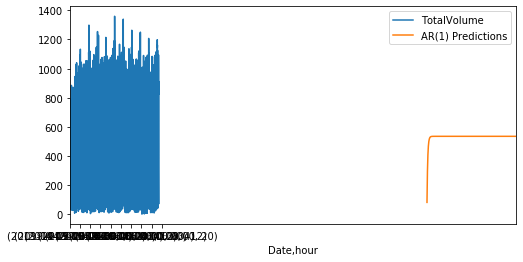

In [69]:
test.plot(legend=True)
predictions1.plot(legend=True,figsize=(8,4));

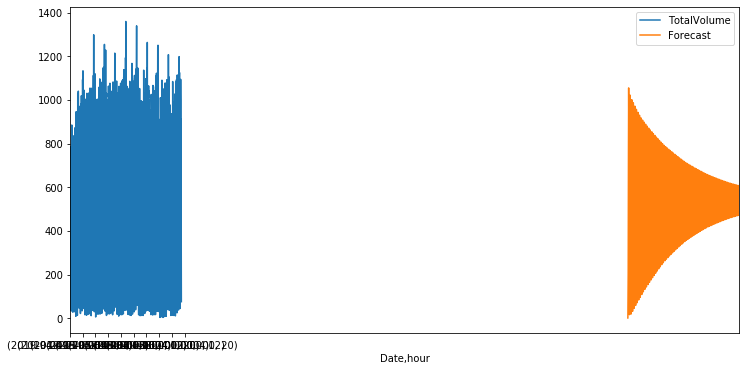

In [65]:
# First, retrain the model on the full dataset
model = AR(df_will_DH['TotalVolume'])

# Next, fit the model
ARfit = model.fit(maxlag=24,method='mle')

# Make predictions
fcast = ARfit.predict(start=len(df_will_DH), end=len(df_will_DH)+7, dynamic=False).rename('Forecast')

# Plot the results
df_will_DH['TotalVolume'].iloc[(len(df_will_DH['TotalVolume']) * 4 // 5):].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));

In [64]:
len(df_will_DH['TotalVolume'].iloc[(len(df_will_DH['TotalVolume']) * 4 // 5):])

1748

In [42]:
df_will_DH.tail()

TotalVolume  shiftDay   Diff
Date       hour                              
2019-06-30 19            533     933.0 -400.0
           20            408     605.0 -197.0
           21            308     421.0 -113.0
           22            253     357.0 -104.0
           23             76     256.0 -180.0

In [75]:
train.index[-1]

(Timestamp('2019-04-19 00:00:00'), 3)

In [56]:
df_will_DH.loc[('2019-06-30', 23)]['TotalVolume']

76.0

In [76]:
time = pd.to_datetime('2019-06-30')

In [77]:
time + pd.to_datetime(9, format="%H")

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'

In [294]:
hour = "09:15"
timeh = pd.to_datetime(hour, format = "%H:%M")
fixed = pd.to_datetime(time.strftime("%Y-%m-%d") + "-" + timeh.strftime("%H:%M"))

# Decomposition

In [309]:
qwerty = df_wool.iloc[30:400]
qwerty_diff = qwerty.diff(periods=7).dropna()
decomposition = seasonal_decompose(qwerty_diff)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [312]:

def plotdecomp(qwerty_diff):
    decomposition = seasonal_decompose(qwerty_diff)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    # Plot gathered statistics
    plt.figure(figsize=(20,10))
    plt.subplot(411)
    plt.plot(qwerty_diff, label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()

In [321]:
np.log(df_wool)

,TotalVolume,Shift7,Shift14
Date,,,
2018-07-01 00:00:00,5.918894,5.726848,6.824374
2018-07-01 01:00:00,5.420535,5.921578,5.638355
2018-07-01 02:00:00,5.075174,5.407172,5.777652
2018-07-01 03:00:00,4.682131,5.062595,5.075174
2018-07-01 04:00:00,4.787492,4.682131,5.062595
...,...,...,...
2019-06-30 19:00:00,7.346655,7.600902,7.867106
2019-06-30 20:00:00,7.166266,7.274480,7.599902
2019-06-30 21:00:00,7.030857,7.126891,7.275172


In [335]:
df_wool_logged = np.log(df_wool)
df_wool_logged_diff = df_wool_logged.diff(periods=7).dropna()
df_wool_diff_logged = df_wool.diff(periods=7).dropna()

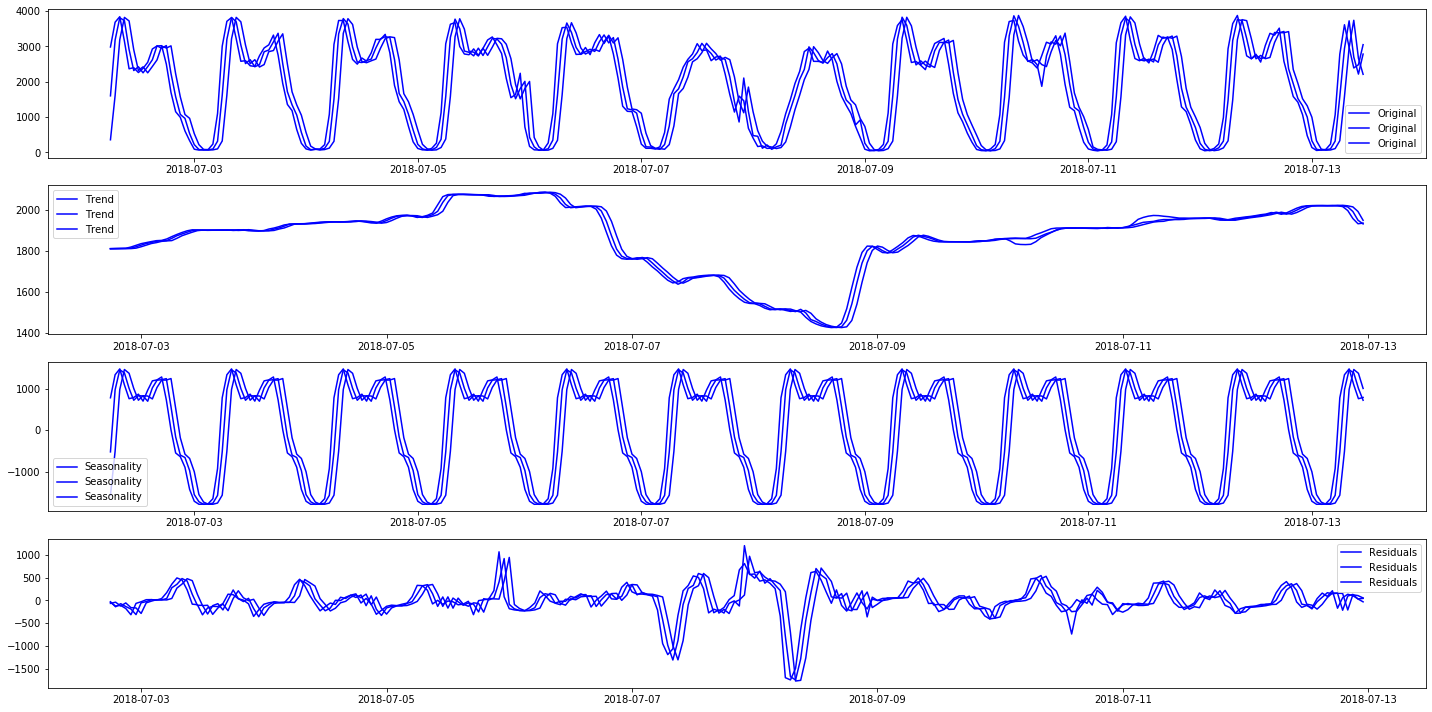

In [326]:
plotdecomp(df_wool.iloc[30:300])

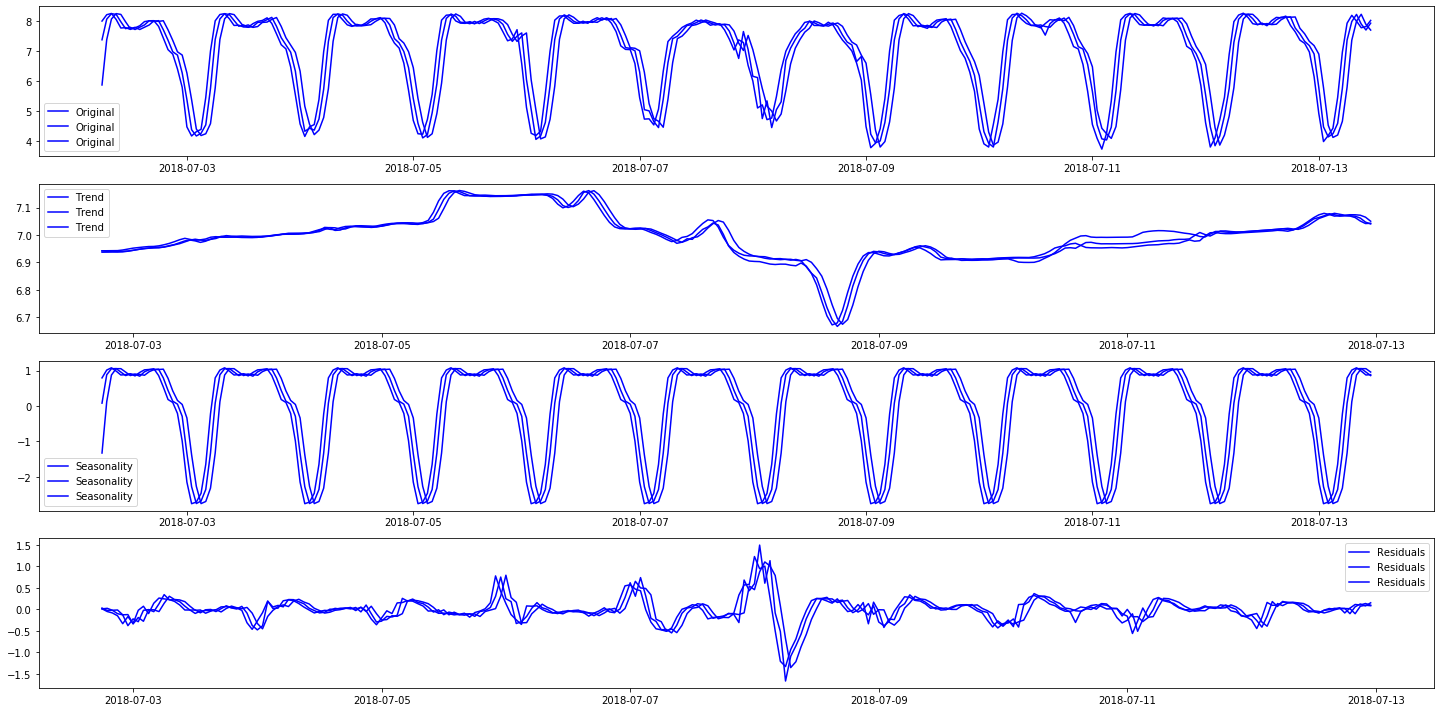

In [327]:
plotdecomp(df_wool_logged.iloc[30:300])

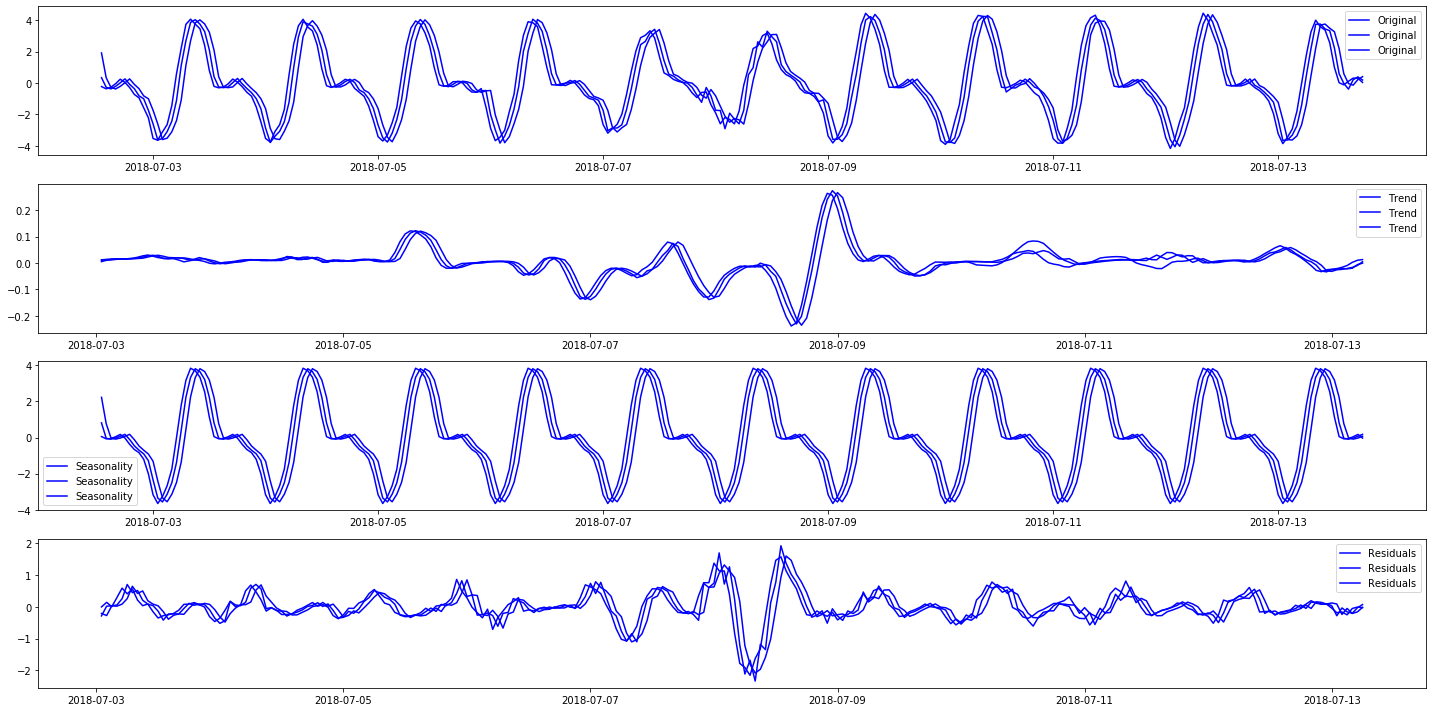

In [328]:
plotdecomp(df_wool_logged_diff.iloc[30:300])

In [332]:
plotdecomp(df_wool_diff_logged.iloc[30:300])

ValueError: This function does not handle missing values

,TotalVolume,Shift7,Shift14
Date,,,
2018-07-01 07:00:00,6.655440,6.144186,NaN
2018-07-01 08:00:00,7.116394,6.664409,6.456770
2018-07-01 09:00:00,7.556951,7.115582,6.794587
2018-07-01 10:00:00,7.739359,7.555905,7.286192
2018-07-01 11:00:00,7.870166,7.740230,7.609367
...,...,...,...
2019-06-30 19:00:00,NaN,NaN,3.737670
2019-06-30 20:00:00,NaN,NaN,NaN
2019-06-30 21:00:00,NaN,NaN,NaN


In [342]:
df_wool_diff_logged

,TotalVolume,Shift7,Shift14
Date,,,
2018-07-01 07:00:00,777.0,466.0,-641.0
2018-07-01 08:00:00,1232.0,784.0,637.0
2018-07-01 09:00:00,1914.0,1231.0,893.0
2018-07-01 10:00:00,2297.0,1912.0,1460.0
2018-07-01 11:00:00,2618.0,2299.0,2017.0
...,...,...,...
2019-06-30 19:00:00,-1217.0,-897.0,42.0
2019-06-30 20:00:00,-1391.0,-1294.0,-904.0
2019-06-30 21:00:00,-1601.0,-1413.0,-1289.0


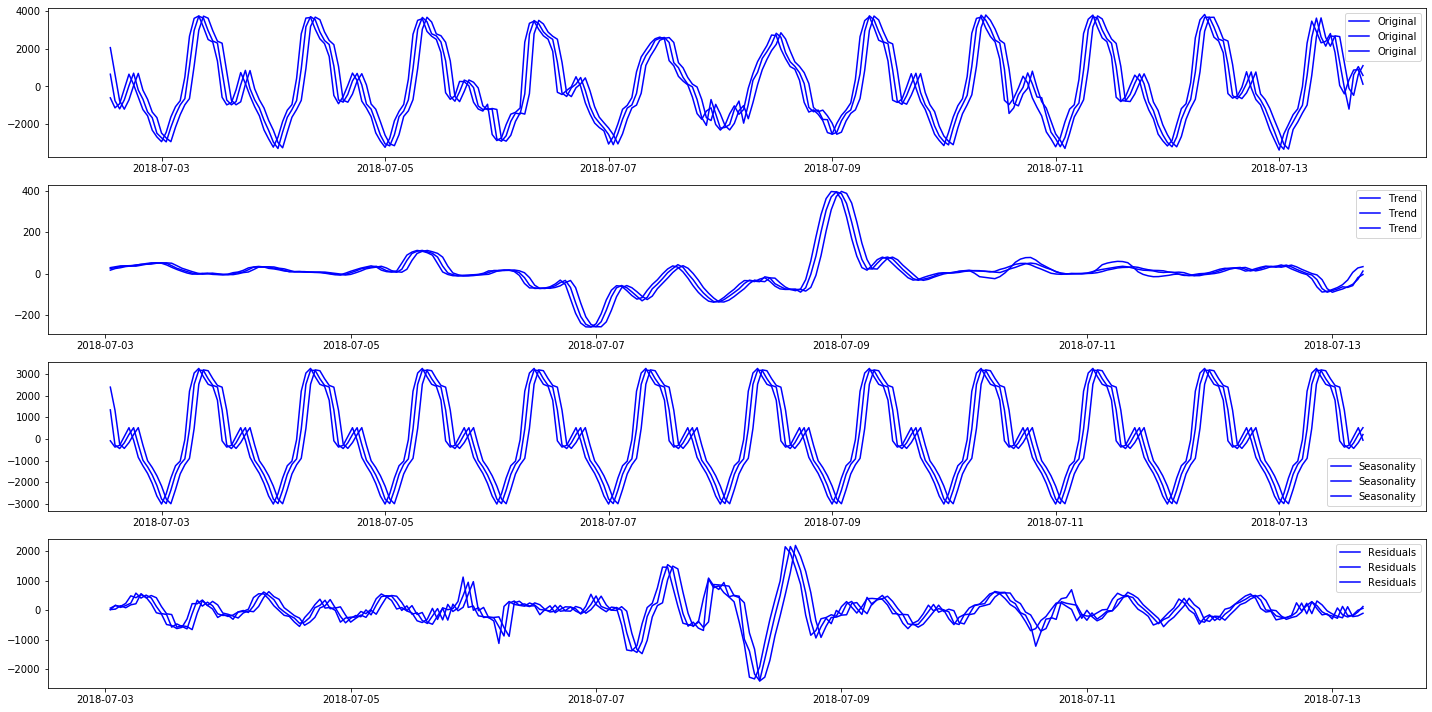